# Time Series z EO Browser | SentinelHub (S2)

**Popis:**

Tento Jupyter Notebook obsahuje kód jazyka Python, ktorý vykonáva analýzu a vizualizáciu údajov na súbore časových radov hodnôt NDVI (Normalized Difference Vegetation Index) z EO (Earth Observation) Browser. 

Kód demonštruje nasledujúce kroky:

1. **Načítanie a analýza údajov NDVI z EO Browser:** Skript načíta súbor údajov časového radu zo súboru CSV pomocou knižnice Pandas. Potom konvertuje stĺpec "C0/date" na dátum a nastaví ho ako index pre časovú analýzu.

2. **Filtrovanie údajov časových radov:** Skript vyberie len hodnoty bez oblačnosti.

3. **Vyhladenie údajov NDVI pomocou Savitzkyho-Golayovho filtra:** Skript vyhladí časový rad pomocou Savitzkyho-Golayovho filtra.

4. **Vzorkovanie údajov časového radu na identifikáciu trendov a anomálií s ročnými hodnotami:** Signál NDVI sa prevzorkuje na výpočet ročných priemerov a štandardných odchýlok. Dosiahne sa to pomocou metódy `resample`, ktorá agreguje údaje s ročnou frekvenciou ("Y") = Year (Rok).

5. **Detekcia zmeny:** Ročné priemerné hodnoty NDVI sa rozdelia do dvoch skupín na základe prahovej hodnoty (treshold) (v tomto prípade medzi 0,20 - 0,55). Skupiny sú buď "Pod prahovou hodnotou" alebo "Nad prahovou hodnotou alebo jej rovná hodnota". To ukazuje, v ktorom roku došlo k zmene.

6. **Vizualizácia:** Skript vykreslí všetky získané hodnoty v tom istom obrázku alebo v samostatnom vzhľade.


**Použitie:**

Tento kód môžete použiť ako šablónu na analýzu a vizualizáciu údajov časových radov z prehliadača EO Browser pomocou programov Pandas a Matplotlib. Je obzvlášť užitočný na posúdenie ročných trendov hodnôt NDVI a identifikáciu období nad alebo pod určenou prahovou hodnotou.

**Poznámka:**

Pred spustením kódu sa uistite, že máte súbor CSV z EO Browser v rovnakom adresári ako tento zápisník.


In [ ]:
# Knižnice
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

## Načítanie a analýza údajov NDVI
Začneme načítaním súboru údajov do knižnice Pandas DataFrame. Na tento účel sa používa funkcia "pd.read_csv". Parameter 'index_col' špecifikujeme ako 'C0/date', aby sme nastavili stĺpec s dátumom ako index, a tiež použijeme 'parse_dates=True', aby sme správne analyzovali dátumy.

In [3]:
# Načítajte svoj DataFrame zo súboru CSV, napr. 'NDVI_S2_example.csv'
df = pd.read_csv('data/NDVI_S2_example.csv', index_col='C0/date', parse_dates=True)

#### Filtrovanie údajov
Ďalej filtrujeme údaje tak, aby sme vybrali len riadky, v ktorých je pokrytie oblačnosti rovné 0 (jasná obloha). To dosiahneme vytvorením nového DataFrame s názvom "filtered_df" pomocou logického indexovania.

In [4]:
# Filtrovanie údajov, kde je pokrytie oblačnosti 0
filtered_df = df[df['C0/cloudCoveragePercent'] == 0]

#### Výber stĺpcov z tabuľky (DataFrame)
Z filtrovaného DataFrame vyberieme konkrétne stĺpce, s ktorými budeme pracovať, ako napríklad priemer, štandardná odchýlka, minimum, maximum, medián, p10 (10. percentil) a p90 (90. percentil) hodnoty NDVI.

In [5]:
# Vyberte stĺpce z tabuľky, s ktorými chcete pracovať
mean_column = 'C0/mean'
stdev_column = 'C0/stDev'
min_column = 'C0/min'
max_column = 'C0/max'
median_column = 'C0/median'
p10_column = 'C0/p10'
p90_column = 'C0/p90'

mean_signal = filtered_df[mean_column]
stdev = filtered_df[stdev_column]
min_signal = filtered_df[min_column]
max_signal = filtered_df[max_column]
median_signal = filtered_df[median_column]
p10_signal = filtered_df[p10_column]
p90_signal = filtered_df[p90_column]

#### Vykreslenie údajov
Vytvoríme graf časového radu na vizualizáciu vybraných údajov NDVI. Graf obsahuje priemerný signál, štandardnú odchýlku ako svetlú oblasť okolo priemerného signálu, minimálny a maximálny signál, mediánový signál, signály p10 (10 percentil) a p90 (90 percentil). Každý signál je kvôli prehľadnosti znázornený inou farbou a štýlom čiary.

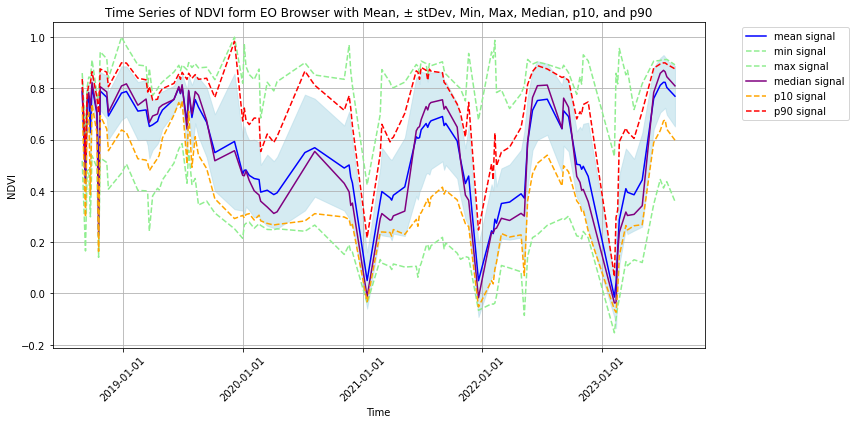

In [6]:
# Vykreslite signál, štandardnú odchýlku, min a max
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mean_signal, label='mean signal', color='blue')
ax.fill_between(mean_signal.index, mean_signal - stdev, mean_signal + stdev, color='lightblue', alpha=0.5)
ax.plot(min_signal, label='min signal', color='lightgreen', linestyle='dashed')
ax.plot(max_signal, label='max signal', color='lightgreen', linestyle='dashed')
ax.plot(median_signal, label='median signal', color='purple')
ax.plot(p10_signal, label='p10 signal', color='orange', linestyle='dashed')
ax.plot(p90_signal, label='p90 signal', color='red', linestyle='dashed')

# Konfigurácia formátovania dátumu na osi x
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Pridať názvy osí, mriežku a nadpis
ax.set_xlabel('Čas')
ax.set_ylabel('NDVI')
ax.set_title('Časový rad NDVI z prehliadača EO s priemerom, ± stDev, min, max, medián, p10 a p90')

# Presunte legendu mimo grafu
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Pridať mriežku
ax.grid(True)


# Upraviť rozloženie
plt.tight_layout()

# Zobraziť plochu grafu
plt.show()


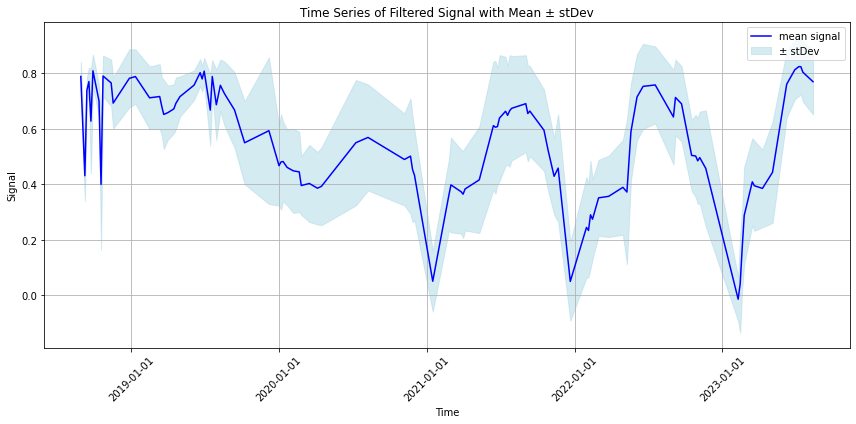

In [7]:
# Vykreslite signál, štandardnú odchýlku, min a max
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mean_signal, label='priemerný signál', color='blue')
ax.fill_between(mean_signal.index, mean_signal - stdev, mean_signal + stdev, color='lightblue', alpha=0.5, label='± stDev')
#ax.plot(min_signal, label='min signal', color='lightgreen', linestyle='dashed')
#ax.plot(max_signal, label='max signal', color='lightgreen', linestyle='dashed')

# Konfigurácia formátovania dátumu na osi x
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Pridať názvy osí, mriežku a legendu
ax.set_xlabel('Čas')
ax.set_ylabel('Signál')
ax.set_title('Časový rad filtrovaného signálu s priemerom ± stDev')
ax.legend()
ax.grid(True)

# Zobraziť plochu grafu
plt.tight_layout()
plt.show()


## Vyhladzovanie údajov NDVI pomocou Savitzkyho-Golayovho filtra

Savitzkyho-Golayov filter je užitočný nástroj na vyhladzovanie časových radov údajov v aplikáciách diaľkového prieskumu Zeme. Pomáha redukovať šum a zvýrazňuje základné trendy alebo vzory v údajoch. 

Parametre window_length a poly_order môžete upraviť, aby ste doladili účinok vyhladzovania na základe konkrétnych údajov a cieľov analýzy. 

Dlhšia dĺžka okna_length (dĺžka okna) bude mať za následok vyhladenie kriviek, ale ak je nastavená príliš vysoko, môže tiež rozostriť dôležité prvky. 

Analyzujte vyhladené údaje časových radov, aby ste identifikovali trendy, anomálie alebo vzory, ktoré môžu byť menej zjavné v zašumených nespracovaných údajoch.

In [ ]:
# Definujte poradie polynómu a dĺžku okna
polyorder = 3
window_length = 21

# Aplikujte Savitzkyho-Golayov filter na každý signál
smoothed_mean_signal = savgol_filter(filtered_df[mean_column], window_length=window_length, polyorder=polyorder)
smoothed_min_signal = savgol_filter(filtered_df[min_column], window_length=window_length, polyorder=polyorder)
smoothed_max_signal = savgol_filter(filtered_df[max_column], window_length=window_length, polyorder=polyorder)
smoothed_median_signal = savgol_filter(filtered_df[median_column], window_length=window_length, polyorder=polyorder)
smoothed_p10_signal = savgol_filter(filtered_df[p10_column], window_length=window_length, polyorder=polyorder)
smoothed_p90_signal = savgol_filter(filtered_df[p90_column], window_length=window_length, polyorder=polyorder)

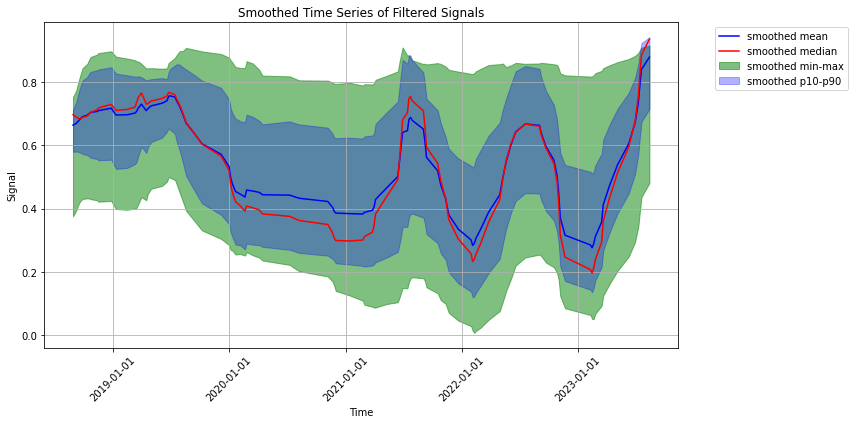

In [9]:
# Vykreslite vyhladené signály
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(filtered_df.index, smoothed_mean_signal, label='smoothed mean', color='blue')
ax.fill_between(filtered_df.index, smoothed_min_signal, smoothed_max_signal, color='green', alpha=0.5, label='smoothed min-max')
ax.plot(filtered_df.index, smoothed_median_signal, label='smoothed median', color='red')
ax.fill_between(filtered_df.index, smoothed_p10_signal, smoothed_p90_signal, color='blue', alpha=0.3, label='smoothed p10-p90')

# Konfigurácia formátovania dátumu na osi x
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Pridať názvy osí, mriežku a nadpis
ax.set_xlabel('Čas')
ax.set_ylabel('Signál')
ax.set_title('Vyhladené časové rady filtrovaných signálov')

# Presunúť legendu mimo grafu
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Pridať mriežku
ax.grid(True)

# Upraviť rozloženie
plt.tight_layout()

# Save the plot as a PNG image with 300 DPI
#plt.savefig('plot.png', dpi=300)

# Zobrazenie grafu
plt.show()


## Porovnanie časových radov ihličnatých a listnatých drevín

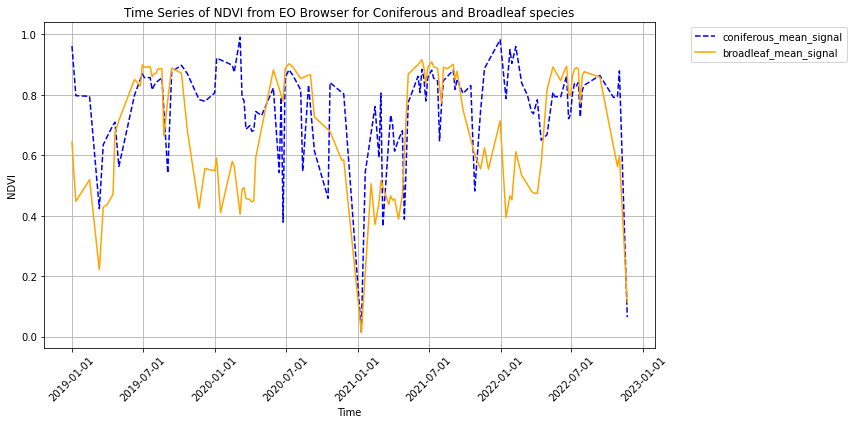

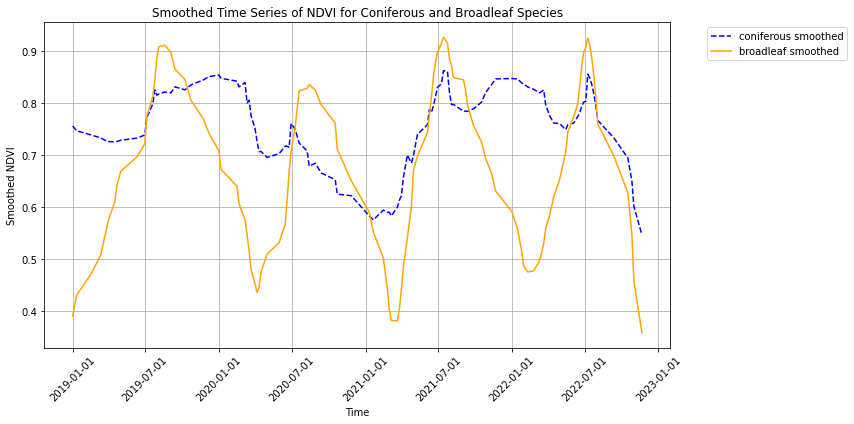

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

# Načítanie údajov do DataFrames
coniferous_df = pd.read_csv('data/coniferous_NDVI.csv', index_col='C0/date', parse_dates=True)
broadleaf_df = pd.read_csv('data/broadleaf_NDVI.csv', index_col='C0/date', parse_dates=True)

# Aplikujte podmienku odstranenia oblačnosti na oba DataFrames
coniferous_df = coniferous_df[coniferous_df['C0/cloudCoveragePercent'] == 0]
broadleaf_df = broadleaf_df[broadleaf_df['C0/cloudCoveragePercent'] == 0]

# Výpis požadovaných stĺpcov na vykreslenie
mean_column = 'C0/mean'

coniferous_mean_signal = coniferous_df[mean_column]
broadleaf_mean_signal = broadleaf_df[mean_column]

# Filtrovanie údajov pre požadovaný rozsah dátumov (od 1. januára 2019 do 1. januára 2023)
start_date = '2019-01-01'
end_date = '2023-01-01'

coniferous_mean_signal = coniferous_mean_signal[start_date:end_date]
broadleaf_mean_signal = broadleaf_mean_signal[start_date:end_date]

# Vykresliť signál
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(coniferous_mean_signal, label='coniferous_mean_signal', color='blue', linestyle='dashed')
ax.plot(broadleaf_mean_signal, label='broadleaf_mean_signal', color='orange')

# Konfigurácia formátovania dátumu na osi x
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Pridať názvy osí, mriežku a nadpis
ax.set_xlabel('Čas')
ax.set_ylabel('NDVI')
ax.set_title('Časový rad NDVI z prehliadača EO pre ihličnaté a listnaté druhy')

# Presunúť legendu mimo grafu
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Pridať mriežku
ax.grid(True)

# Upraviť rozloženie
plt.tight_layout()

#plt.savefig('plot_species1.png', dpi=300)

# Zobrazenie grafu
plt.show()

# Aplikujte Savitzky-Golayov filter na údaje v rámci rozsahu dátumov
window_length = 21  # Túto hodnotu upravte podľa potreby
polyorder = 2       # Túto hodnotu upravte podľa potreby

coniferous_smoothed = savgol_filter(coniferous_mean_signal, window_length, polyorder)
broadleaf_smoothed = savgol_filter(broadleaf_mean_signal, window_length, polyorder)

# Vytvorenie nového DataFrame s vyhladenými údajmi a filtrovaným rozsahom dátumov
smoothed_data = pd.DataFrame({'coniferous_smoothed': coniferous_smoothed, 'broadleaf_smoothed': broadleaf_smoothed}, index=coniferous_mean_signal.index)

# Vykresliť vyhladené údaje
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(smoothed_data.index, smoothed_data['coniferous_smoothed'], label='coniferous smoothed', color='blue', linestyle='dashed')
ax.plot(smoothed_data.index, smoothed_data['broadleaf_smoothed'], label='broadleaf smoothed', color='orange')

# Konfigurácia formátovania dátumu na osi x (rovnako ako predtým)
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Pridať názvy osí, mriežku a nadpis (rovnako ako predtým)
ax.set_xlabel('Čas')
ax.set_ylabel('Smoothed NDVI')
ax.set_title('Vyhladené časové rady NDVI pre ihličnaté a listnaté druhy')

# Presunúť legendu mimo grafu (rovnako ako predtým)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Pridať mriežku (rovnako ako predtým)
ax.grid(True)

# Upravte rozloženie (rovnako ako predtým)
plt.tight_layout()
#plt.savefig('plot_species.png', dpi=300)

# Zobrazenie grafu
plt.show()


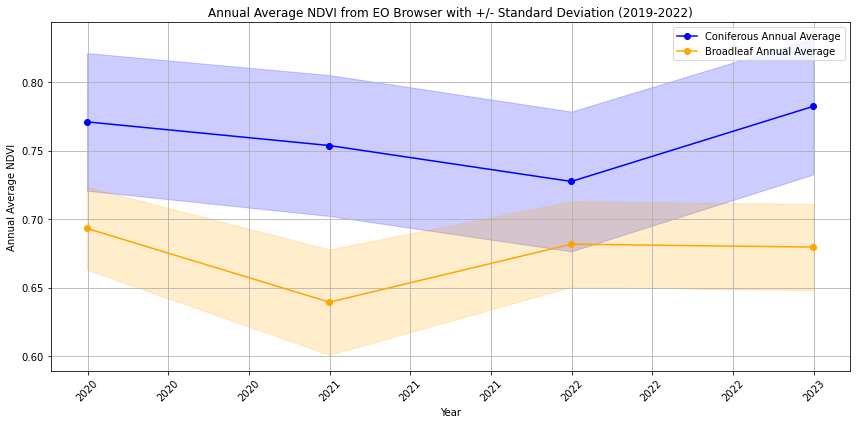

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

# Načítanie údajov do DataFrames
coniferous_df = pd.read_csv('data/coniferous_NDVI.csv', index_col='C0/date', parse_dates=True)
broadleaf_df = pd.read_csv('data/broadleaf_NDVI.csv', index_col='C0/date', parse_dates=True)

# Aplikujte podmienku odstranenia oblačnosti na oba DataFrames
coniferous_df = coniferous_df[coniferous_df['C0/cloudCoveragePercent'] == 0]
broadleaf_df = broadleaf_df[broadleaf_df['C0/cloudCoveragePercent'] == 0]

# Výpis požadovaných stĺpcov na vykreslenie
mean_column = 'C0/mean'
std_dev_column = 'C0/stDev'

coniferous_mean_signal = coniferous_df[mean_column]
broadleaf_mean_signal = broadleaf_df[mean_column]
coniferous_std_dev = coniferous_df[std_dev_column]
broadleaf_std_dev = broadleaf_df[std_dev_column]

# Filtrovanie údajov pre požadovaný rozsah dátumov (od 1. januára 2019 do 1. januára 2023)
start_date = '2019-01-01'
end_date = '2023-01-01'

coniferous_mean_signal = coniferous_mean_signal[start_date:end_date]
broadleaf_mean_signal = broadleaf_mean_signal[start_date:end_date]
coniferous_std_dev = coniferous_std_dev[start_date:end_date]
broadleaf_std_dev = broadleaf_std_dev[start_date:end_date]

# Prevzorkovanie údajov na výpočet ročných priemerov
coniferous_annual_averages = coniferous_mean_signal.resample('Y').mean()
broadleaf_annual_averages = broadleaf_mean_signal.resample('Y').mean()

# Prevzorkovanie údajov o štandardnej odchýlke na výpočet ročných štandardných odchýlok
coniferous_annual_std_dev = coniferous_std_dev.resample('Y').mean()
broadleaf_annual_std_dev = broadleaf_std_dev.resample('Y').mean()

# Vykreslite ročné priemery so štandardnou odchýlkou +/-
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(coniferous_annual_averages.index, coniferous_annual_averages, label='Coniferous Annual Average', color='blue', marker='o')
ax.fill_between(coniferous_annual_averages.index, coniferous_annual_averages - coniferous_annual_std_dev, coniferous_annual_averages + coniferous_annual_std_dev, alpha=0.2, color='blue')
ax.plot(broadleaf_annual_averages.index, broadleaf_annual_averages, label='Broadleaf Annual Average', color='orange', marker='o')
ax.fill_between(broadleaf_annual_averages.index, broadleaf_annual_averages - broadleaf_annual_std_dev, broadleaf_annual_averages + broadleaf_annual_std_dev, alpha=0.2, color='orange')

# Konfigurácia formátovania dátumu na osi x (zobrazenie rokov)
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Pridať názvy osí, mriežku a nadpis
ax.set_xlabel('Year')
ax.set_ylabel('Annual Average NDVI')
ax.set_title('Annual Average NDVI from EO Browser with +/- Standard Deviation (2019-2022)')

# Pridať legendu
ax.legend()

# Pridať mriežku
ax.grid(True)

# Upraviť rozloženie
plt.tight_layout()

plt.savefig('plot_species.png', dpi=300)

# Zobraziť plochu grafu
plt.show()


## Prevzorkovanie údajov časových radov na identifikáciu trendov a anomálií s ročnými hodnotami

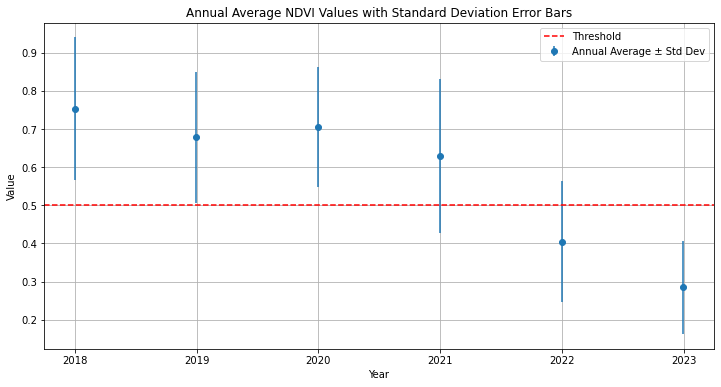

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítajte DataFrame a vytvorte signál časového radu
df = pd.read_csv('data/NDVI_S2_example.csv')
df['C0/date'] = pd.to_datetime(df['C0/date'])
df.set_index('C0/date', inplace=True)
signal = df['C0/mean']

# Prevzorkovanie signálu na výpočet ročných priemerov a štandardných odchýlok
annual_averages = signal.resample('Y').mean()
annual_std_dev = signal.resample('Y').std()

# Vykreslite ročné priemerné hodnoty s chybovými úsečkami (plus/mínus štandardná odchýlka)
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(annual_averages.index, annual_averages, yerr=annual_std_dev, fmt='o', label='Annual Average ± Std Dev')

# Pridajte vodorovnú čiaru v bode y = 0,5
ax.axhline(y=0.5, color='red', linestyle='--', label='Threshold')

# Pridanie názvy osí, názvu a mriežky do grafu
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Annual Average NDVI Values with Standard Deviation Error Bars')
ax.legend()
ax.grid(True)

# Uložte graf ako obrázok PNG s rozlíšením 300 DPI
# plt.savefig('plot.png', dpi=300)

# Zobrazenie grafu
plt.show()


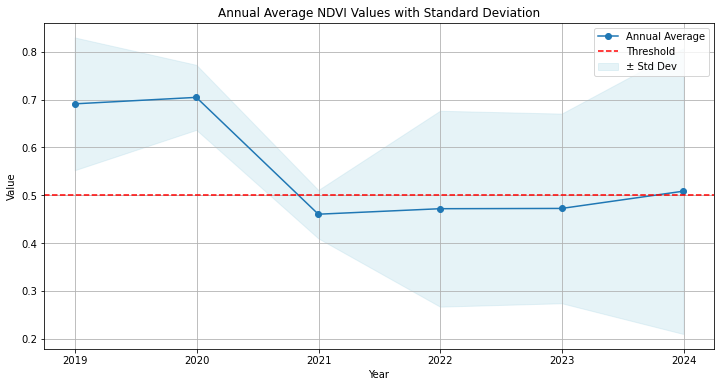

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítajte DataFrame a vytvorte signál časového radu
df = pd.read_csv('data/NDVI_S2_example3.csv')
df['C0/date'] = pd.to_datetime(df['C0/date'])
df.set_index('C0/date', inplace=True)
signal = df['C0/mean']

# Prevzorkovanie signálu na výpočet ročných priemerov a štandardných odchýlok
annual_averages = signal.resample('Y').mean()
annual_std_dev = signal.resample('Y').std()

# Vykreslite ročné priemerné hodnoty s čiarovým grafom a chybovými úsečkami
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(annual_averages.index, annual_averages, marker='o', label='Annual Average')
ax.fill_between(annual_averages.index, annual_averages - annual_std_dev, annual_averages + annual_std_dev, color='lightblue', alpha=0.3, label='± Std Dev')

# Pridajte vodorovnú čiaru v bode y = 0,5
ax.axhline(y=0.5, color='red', linestyle='--', label='Threshold')

# Pridanie názvov osí, názvu a mriežky do grafu
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Annual Average NDVI Values with Standard Deviation')
ax.legend()
ax.grid(True)

# Uložte graf ako obrázok PNG s rozlíšením 300 DPI
# plt.savefig('plot1.png', dpi=300)

# Zobrazenie grafu
plt.show()


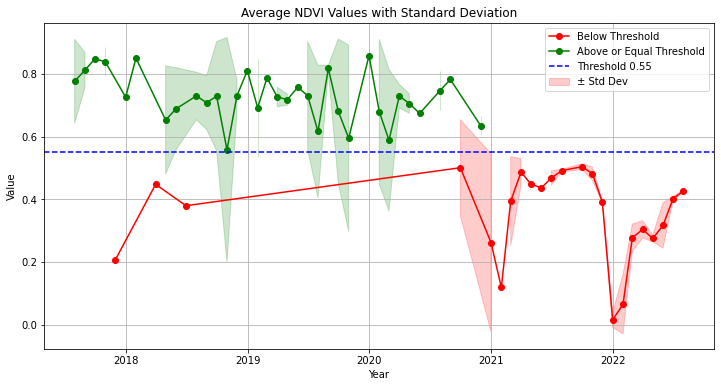

In [14]:
# Načítajte DataFrame a vytvorte signál časového radu
df = pd.read_csv('data/NDVI_S2_example.csv')
df['C0/date'] = pd.to_datetime(df['C0/date'])
df.set_index('C0/date', inplace=True)
signal = df['C0/mean']

# Prevzorkovanie signálu na výpočet štvrťročných priemerov a štandardných odchýlok
quarterly_averages = signal.resample('Q').mean()
quarterly_std_dev = signal.resample('Q').std()

# Rozdeľte štvrťročné priemery do dvoch skupín na základe prahovej hodnoty
below_threshold = quarterly_averages[quarterly_averages < 0.55]
above_or_equal_threshold = quarterly_averages[quarterly_averages >= 0.55]

# Vykresliť štvrťročné priemery pod prahovou hodnotou
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(below_threshold.index, below_threshold, marker='o', color='red', label='Below Threshold')
ax.fill_between(below_threshold.index, below_threshold - quarterly_std_dev[below_threshold.index], below_threshold + quarterly_std_dev[below_threshold.index], color='red', alpha=0.2, label='± Std Dev')

# Vykresliť štvrťročné priemery nad prahovou hodnotou alebo rovné tejto prahovej hodnote
ax.plot(above_or_equal_threshold.index, above_or_equal_threshold, marker='o', color='green', label='Above or Equal Threshold')
ax.fill_between(above_or_equal_threshold.index, above_or_equal_threshold - quarterly_std_dev[above_or_equal_threshold.index], above_or_equal_threshold + quarterly_std_dev[above_or_equal_threshold.index], color='green', alpha=0.2)

# Add a horizontal line at y = 0.5
ax.axhline(y=0.55, color='blue', linestyle='--', label='Threshold 0.55')

# Pridanie názvov osí, názvu a mriežky do grafu
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Average NDVI Values with Standard Deviation')
ax.legend()
ax.grid(True)

# Uložte graf ako obrázok PNG s rozlíšením 300 DPI
#plt.savefig('plot2.png', dpi=300)

plt.show()


In [15]:
quarterly_averages

C0/date
2017-07-31 00:00:00+00:00    0.776411
2017-08-31 00:00:00+00:00    0.811887
2017-09-30 00:00:00+00:00    0.848215
2017-10-31 00:00:00+00:00    0.838269
2017-11-30 00:00:00+00:00    0.206435
                               ...   
2022-03-31 00:00:00+00:00    0.303791
2022-04-30 00:00:00+00:00    0.274760
2022-05-31 00:00:00+00:00    0.316333
2022-06-30 00:00:00+00:00    0.401724
2022-07-31 00:00:00+00:00    0.426326
Freq: M, Name: C0/mean, Length: 61, dtype: float64

### Funkcia detekcie zmeny
Tu je definovaná funkcia s názvom detect_abrupt_changes. 

Táto funkcia prijíma tri parametre: 
- signál (signál časového radu), 
- prah (prahová hodnota na určenie náhlych zmien) a 
- veľkosť okna (veľkosť okna na výpočet priemeru). 

Funkcia prechádza naprieč signálom a porovnáva rozdiel medzi aktuálnou hodnotou a priemerom predchádzajúcich hodnôt v rámci okna. Ak je rozdiel väčší ako prah, zistí sa náhla zmena a do zoznamu zmien sa pridá hodnota 1; v opačnom prípade sa pridá hodnota 0.

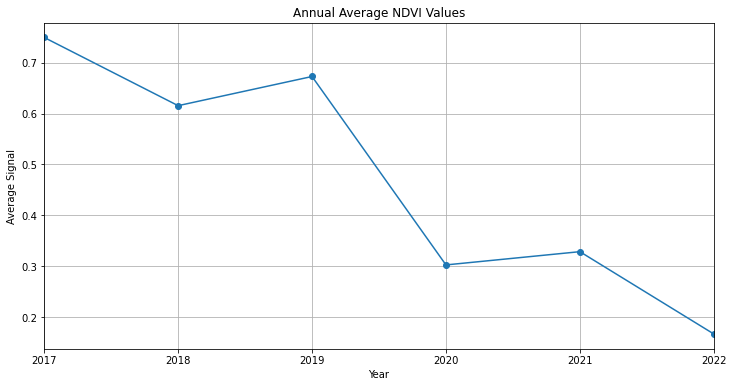

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítajte DataFrame a vytvorte signál časového radu
df = pd.read_csv('data/NDVI_S2_example1.csv')
df['C0/date'] = pd.to_datetime(df['C0/date'])
df.set_index('C0/date', inplace=True)
signal = df['C0/mean']

# Prevzorkovanie signálu na výpočet ročných priemerov
annual_averages = signal.resample('Y').mean()

# Vykreslite ročné priemerné hodnoty ako čiarový graf
fig, ax = plt.subplots(figsize=(12, 6))
annual_averages.plot(kind='line', marker='o', ax=ax)

# Pridanie názvov osí, názvu a mriežky do grafu
ax.set_xlabel('Year')
ax.set_ylabel('Average Signal')
ax.set_title('Annual Average NDVI Values')
ax.grid(True)

# Zobraziť graf
plt.show()


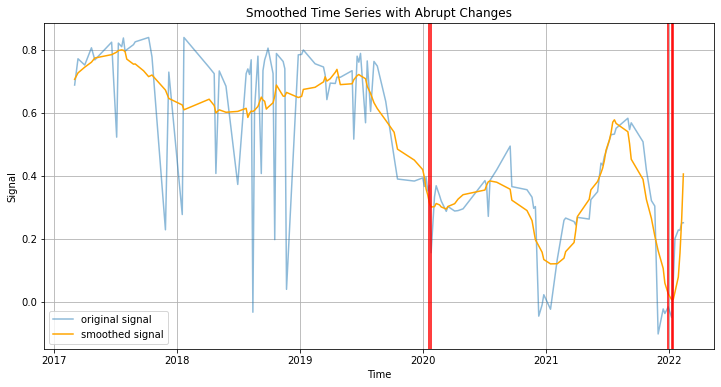

Abrupt change detected on: 2020-01-21 00:00:00+00:00
Abrupt change detected on: 2020-01-26 00:00:00+00:00
Abrupt change detected on: 2021-12-31 00:00:00+00:00
Abrupt change detected on: 2022-01-10 00:00:00+00:00
Abrupt change detected on: 2022-01-15 00:00:00+00:00


In [33]:
# Importovať potrebné knižnice
import pandas as pd  # Import pandas na manipuláciu s údajmi
import matplotlib.pyplot as plt  # Import matplotlib pre vykresľovanie
from scipy.signal import savgol_filter  # Import Savitzky-Golayovho filtra zo SciPy

# Načítajte DataFrame a vytvorte signál časového radu
df = pd.read_csv('data/NDVI_S2_example1.csv')  # Načítanie údajov CSV do rámca DataFrame
df['C0/date'] = pd.to_datetime(df['C0/date'])   # Previesť stĺpec 'C0/date' na dátumový čas
df.set_index('C0/date', inplace=True) # Nastavte 'C0/date' ako index pre časový rad
signal = df['C0/mean']  # Výpis stĺpca 'C0/mean' ako signál

# Definujte vlastnú funkciu na použitie Savitzkyho-Golayovho filtra na sériu pandas
def savitzky_golay_filter(series, window_length, polyorder):
    smoothed_values = savgol_filter(series.values, window_length, polyorder)  # Aplikujte Savitzky-Golayov filter na hodnoty
    smoothed_series = pd.Series(smoothed_values, index=series.index)  # Vytvorenie novej série pandas s vyhladenými hodnotami
    return smoothed_series

# Vyhlaďte signál pomocou vlastnej funkcie Savitzky-Golayovho filtra
smoothed_signal = savitzky_golay_filter(signal, window_length=21, polyorder=3)

# Definujte funkciu detect_abrupt_changes
def detect_abrupt_changes(signal, threshold, window_size):
    changes = []  # Zoznam na ukladanie binárnych hodnôt (0 pre žiadnu zmenu, 1 pre náhlu zmenu)
    change_dates = []  # Uloženie dátumov náhlych zmien
    for i in range(len(signal)):
        if i < window_size:
            changes.append(0)  # Žiadna zmena, ak okno ešte nie je vyplnené
            continue
        window_mean = signal[i - window_size:i].mean()  # Vypočítajte priemer v rámci okna
        if abs(signal[i] - window_mean) > threshold:  # Skontrolujte, či odchýlka prekračuje prahovú hodnotu
            changes.append(1)  # Zistená náhla zmena
            change_dates.append(signal.index[i])  # Uložiť dátum náhlej zmeny
        else:
            changes.append(0)   # Žiadna náhla zmena
    return changes, change_dates

# Použiť funkciu detekcie náhlej zmeny
abrupt_changes, change_dates = detect_abrupt_changes(smoothed_signal, 0.3, 30)

# Previesť zoznam abrupt_changes na pandas Series s rovnakým indexom ako signál
abrupt_changes = pd.Series(abrupt_changes, index=smoothed_signal.index).astype(int)

# Vykreslite vyhladený signál s náhlymi zmenami
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='original signal', alpha=0.5)  # Vykreslite pôvodný signál so zníženou nepriehľadnosťou
ax.plot(smoothed_signal, label='smoothed signal', color='orange')  # Vykreslite vyhladený signál oranžovou farbou
for i in smoothed_signal.index[abrupt_changes == 1]:
    ax.axvline(i, color='r')  # Zvislé červené čiary označujú náhle zmeny

# Pridať názvy osí, mriežku a legendu
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Smoothed Time Series with Abrupt Changes')
ax.legend()  # Zobraziť legendu
ax.grid(True)  # Zobraziť mriežku

# Zobraziť plochu
plt.show()

# Vytlačiť dátumy náhlych zmien
for change_date in change_dates:
    print("Zistená náhla zmena:", change_date)
